# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Question 1

#### What is our independent variable? What is our dependent variable?

In this experiment:
- The dependent variable is the response time it took each participant to identify the color of ink. 
- The independent variable for the experiment is the congruency conditions; including congruent words and incongruent words conditions.

### Question 2

#### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

•	Null Hypothesis $H$<sub>0</sub> – That there is no significant change in time between congruent or incongruent word conditions.  
- $H$<sub>0</sub> (Null Hypothesis): μ<sub>i</sub> = μ<sub>c</sub>
    - μ<sub>i</sub> = population mean of incongruent values
    - μ<sub>c</sub> = population mean of congruent values  

•	Alternate Hypothesis $H$<sub>1</sub> – That there is a significant change in time between congruent or incongruent word conditions.  
- $H$<sub>1</sub> (Alternate Hypothesis): μ<sub>i</sub> ≠ μ<sub>c</sub> 
    - μ<sub>i</sub> = population mean of incongruent values
    - μ<sub>c</sub> = population mean of congruent values  


##### My chosen statistical test: Paired Two Tailed T-Test
The kind of statistical test I will use is the Paired two tailed t-test. I need to compare the two related groups to determine if there is a significant change between their means. The same subjects were tested for congruent words followed by incongruent words.

##### Reason I selected the paired two tailed t-test
- There was no information provided about the population, only 24 samples were supplied.   
- I wanted to consider both sides of the experimeter, upper and lower ranges  
- I wanted personal bias removed from my analysis, by using one tail implies I already know the direction


##### Assumptions
- The data distributions are normal
- The observations were independent of each other.
- Sample size is below 30

### Question 3

#### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

pd.options.display.float_format = '{:,.3f}'.format
plt.rcParams['figure.figsize'] = (12,8)
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
stroop_data = pd.read_excel("stroopdata.xlsx")

In [3]:
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [4]:
# Congruent values count, mean, median, and std
congruent_count = stroop_data['Congruent'].count()
congruent_mean = stroop_data['Congruent'].mean()
congruent_median = stroop_data['Congruent'].median()
congruent_std = stroop_data['Congruent'].std()

In [5]:
# Incongruent values count, mean, median, and std
incongruent_count = stroop_data['Incongruent'].count()
incongruent_mean = stroop_data['Incongruent'].mean()
incongruent_median = stroop_data['Incongruent'].median()
incongruent_std = stroop_data['Incongruent'].std()

In [6]:
stroop_details = pd.DataFrame(
    [
        [congruent_count, incongruent_count],
        [congruent_mean, incongruent_mean],
        [congruent_median, incongruent_median],
        [congruent_std, incongruent_std]
    ],
    index=[
        'Samples',
        'Mean',
        'Median',
        'Standard Deviation'
    ],
    columns=['Congruent', 'Incongruent'])

In [7]:
# Measure of Centrality & Measure of variability
stroop_details

,Congruent,Incongruent
Samples,24.000,24.000
Mean,14.051,22.016
Median,14.357,21.017
Standard Deviation,3.559,4.797


In [8]:
# Additional details on the values, and validation of above table.
stroop_data.describe()

,Congruent,Incongruent
count,24.000,24.000
mean,14.051,22.016
std,3.559,4.797
min,8.630,15.687
25%,11.895,18.717
50%,14.357,21.017
75%,16.201,24.051
max,22.328,35.255


### Question 4

#### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

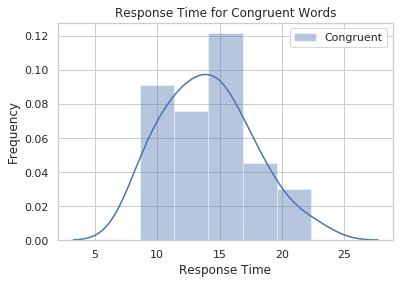

In [9]:
sns.distplot(stroop_data['Congruent'], label='Congruent')
plt.xlabel("Response Time")
plt.ylabel("Frequency")
plt.title("Response Time for Congruent Words")
plt.legend()

The Congruent values are close to being normally distributed and the middle of the data is slightly less than 15.

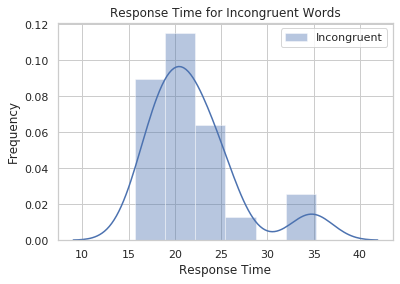

In [10]:
sns.distplot(stroop_data['Incongruent'], label="Incongruent")
plt.xlabel("Response Time")
plt.ylabel("Frequency")
plt.title("Response Time for Incongruent Words")
plt.legend()

For the Incongruent values, there's potential outliers in the dataset causing a slight right skew.

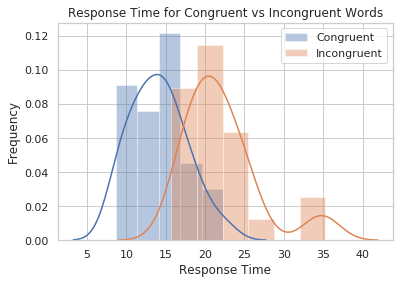

In [11]:
sns.distplot(stroop_data['Congruent'], label = 'Congruent')
sns.distplot(stroop_data['Incongruent'], label = 'Incongruent')
plt.xlabel("Response Time")
plt.ylabel("Frequency")
plt.title("Response Time for Congruent vs Incongruent Words")
plt.legend()

Both Congruent and Incongruent observations look close to being normal distributions. We can also see that the mean is different for both conditions.

### Question 5

#### Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [12]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000,24.000
mean,14.051,22.016
std,3.559,4.797
min,8.630,15.687
25%,11.895,18.717
50%,14.357,21.017
75%,16.201,24.051
max,22.328,35.255


The statistical test chosen is the Two Tailed T-Test  
- The sample size is: 24
- Degrees of Freedom: n - 1 which equals 23

In [13]:
# Locate the t-critical value for a 95% confidence level with 23 degrees of freedom for two tailed test
t_critical_value = t.ppf(.975, 23)

In [14]:
print(f"The t-critical value for a 95% confidence level with 23 degrees of freedom is {round(t_critical_value, 4)}")

The t-critical value for a 95% confidence level with 23 degrees of freedom is 2.0687


##### Reminder:
- Sample Size: 24
- Degrees of Freedom: 23
- t-critical value: 2.0687 (2.069 per t-table chart)

In [15]:
stroop_data['Difference'] = stroop_data['Congruent'] - stroop_data['Incongruent']

Find the difference between the datapoints

In [16]:
stroop_data.head(10)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


I need to find the std and mean of the differences

In [17]:
differences_count = stroop_data['Difference'].count()
differences_std = stroop_data['Difference'].std()
differences_mean = stroop_data['Difference'].mean()

In [18]:
print(f"Std of Differences:\t{round(differences_std,4)}\nMean of Differences:\t{round(differences_mean, 4)}")

Std of Differences:	4.8648
Mean of Differences:	-7.9648


In [19]:
# Calculate the point estimate for the difference of means:
point_estimate = incongruent_mean - congruent_mean

In [20]:
print(f"x̄: {round(point_estimate, 4)}")

x̄: 7.9648


In [21]:
# t-value = x̄ / (diff_std/math.sqrt(24))
t_value = 7.9648/(4.8648 / math.sqrt(24))

In [22]:
print(f"The t-Value is: {round(t_value,4)}")

The t-Value is: 8.0208


- The t-statistic value of 8.0208 is greater than the critical value of 2.0687 which means we can reject the null hypothesis. 

This aligns up with my expectations and personal observation that the congruent task takes much less time to do than the incongruent task.

References

- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/
- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
- https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Two-Sample_T-Test.pdf
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf